In [1]:
# 🔧 Install required packages (if needed)
!pip install scikit-learn pyod xgboost streamlit pandas numpy matplotlib seaborn --quiet

# 📚 Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from pyod.models.auto_encoder import AutoEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Step 1: Simulate Enterprise Logs
def generate_synthetic_logs(num_users=50, days=10):
    logs = []
    base_time = datetime.now()

    for user_id in range(1, num_users + 1):
        for day in range(days):
            date = base_time - timedelta(days=day)
            logins = random.randint(1, 3)
            for _ in range(logins):
                login_time = date + timedelta(hours=random.randint(6, 22))
                file_access = random.randint(5, 20)
                email_count = random.randint(10, 50)
                privileged_access = random.choices([0, 1], weights=[0.9, 0.1])[0]
                logs.append({
                    'user_id': f'user_{user_id}',
                    'timestamp': login_time,
                    'file_access_count': file_access,
                    'email_sent': email_count,
                    'privileged_access': privileged_access
                })
    
    return pd.DataFrame(logs)

logs_df = generate_synthetic_logs()
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df.head()


,user_id,timestamp,file_access_count,email_sent,privileged_access
0,user_1,2025-08-02 12:11:59.240676,8,31,0
1,user_1,2025-08-01 11:11:59.240676,19,43,0
2,user_1,2025-08-01 11:11:59.240676,14,48,0
3,user_1,2025-07-31 07:11:59.240676,11,27,0
4,user_1,2025-07-30 15:11:59.240676,9,45,0


In [2]:
# 🧼 Step 2: Feature Engineering
features_df = logs_df.copy()
features_df['hour'] = features_df['timestamp'].dt.hour
features_df = features_df.groupby('user_id').agg({
    'file_access_count': 'mean',
    'email_sent': 'mean',
    'privileged_access': 'sum',
    'hour': 'mean'
}).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df.drop('user_id', axis=1))
features_df_scaled = pd.DataFrame(X_scaled, columns=['file_access', 'email_sent', 'privileged_access', 'avg_hour'])
features_df_scaled['user_id'] = features_df['user_id']
features_df_scaled.head()


,file_access,email_sent,privileged_access,avg_hour,user_id
0,-1.080549,0.674778,0.105517,0.608788,user_1
1,1.114536,-0.689551,0.859210,-0.449367,user_10
2,-1.659503,0.778947,-0.648176,0.157680,user_11
3,-1.479932,0.267118,-1.401868,0.522156,user_12
4,-0.479395,-1.015548,2.366595,-0.669605,user_13


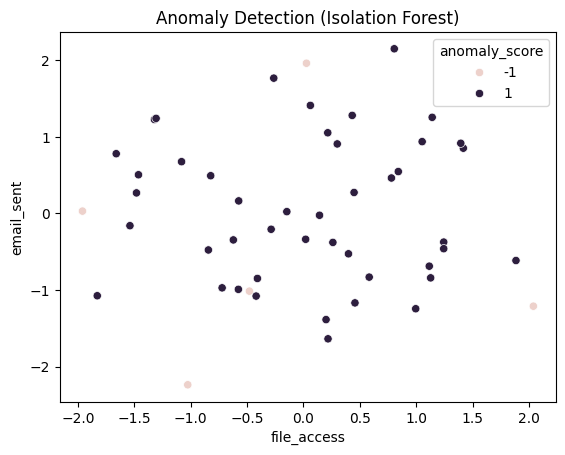

In [3]:
# 🤖 Step 3: Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
features_df_scaled['anomaly_score'] = iso_forest.fit_predict(features_df_scaled.drop('user_id', axis=1))

# Visualize
sns.scatterplot(data=features_df_scaled, x='file_access', y='email_sent', hue='anomaly_score')
plt.title("Anomaly Detection (Isolation Forest)")
plt.show()


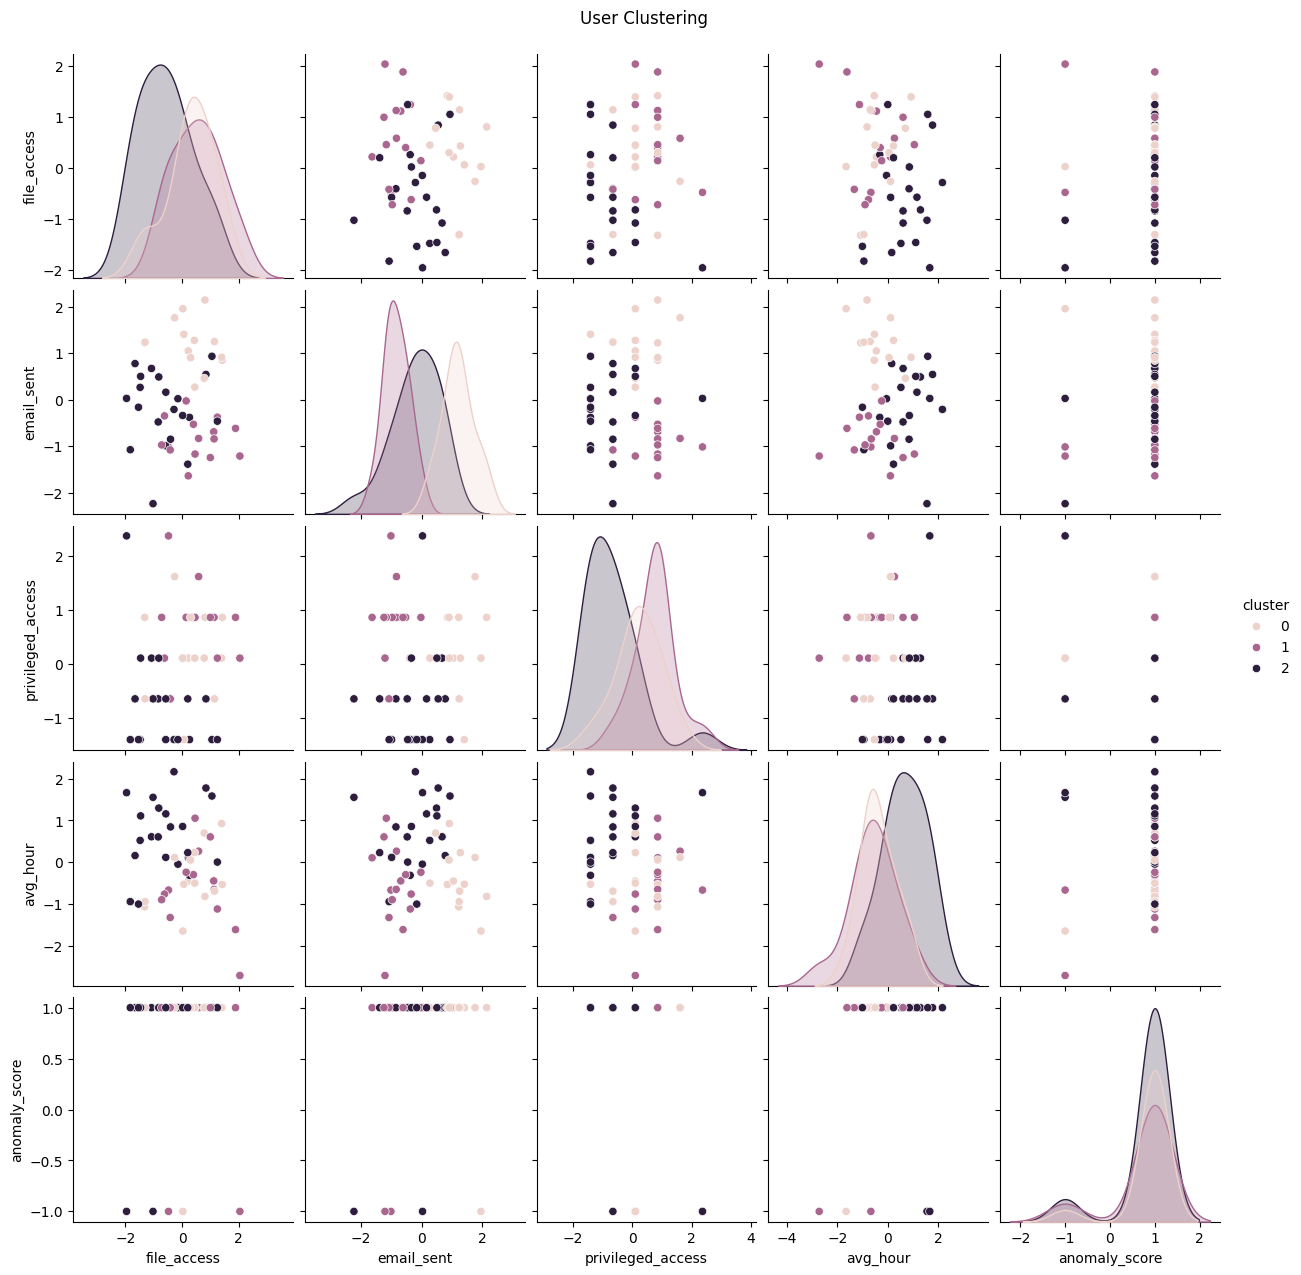

In [4]:
# 🧠 Step 4: Behavior Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
features_df_scaled['cluster'] = kmeans.fit_predict(features_df_scaled.drop(['user_id', 'anomaly_score'], axis=1))

# Visualize clusters
sns.pairplot(features_df_scaled, hue='cluster', diag_kind='kde')
plt.suptitle("User Clustering", y=1.02)
plt.show()


In [5]:
# 🔐 Step 5: Threat Classification (Synthetic Labels)
def assign_threat_label(row):
    if row['privileged_access'] > 2:
        return 'Malicious Insider'
    elif row['anomaly_score'] == -1:
        return 'Compromised Account'
    else:
        return 'Careless Insider'

features_df_scaled['threat_label'] = features_df_scaled.apply(assign_threat_label, axis=1)

# Train classifier
X = features_df_scaled.drop(['user_id', 'threat_label'], axis=1)
y = features_df_scaled['threat_label']
clf = RandomForestClassifier()
clf.fit(X, y)

# Predict risk score
features_df_scaled['predicted_label'] = clf.predict(X)
features_df_scaled[['user_id', 'predicted_label']]


,user_id,predicted_label
0,user_1,Careless Insider
1,user_10,Careless Insider
2,user_11,Careless Insider
3,user_12,Careless Insider
4,user_13,Malicious Insider
5,user_14,Careless Insider
6,user_15,Careless Insider
7,user_16,Careless Insider
8,user_17,Careless Insider
9,user_18,Careless Insider


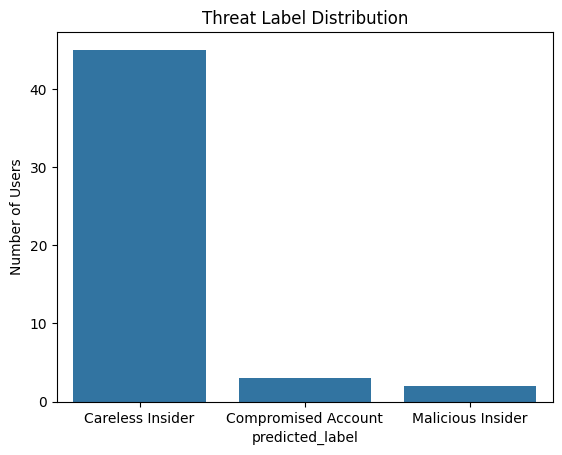

In [6]:
# 📊 Step 6: Risk Dashboard (in notebook)
label_counts = features_df_scaled['predicted_label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Threat Label Distribution")
plt.ylabel("Number of Users")
plt.show()
